In [21]:
import pandas as pd
import numpy as np
import mne
import pywt
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("C:\\Users\\a1882\\Desktop\\EEG\\normal\\data\\128_s100\\lefthand_zyy_04_epocflex_2023_window_16.csv", header=None)

In [23]:
wavelet = pywt.Wavelet('db4')

In [24]:
filtered_data = np.zeros((32, data.shape[1]))
for i in range(32):
    coeffs = pywt.wavedec(data.iloc[i, :], wavelet, level=4)
    coeffs[-1] *= 0
#pywt.wavedec函数返回一个有序的系数数组列表，表示信号的多级离散小波分解。其中，列表中的最后一个元素是逼近系数数组，其余元素是细节系数数组
#coeffs = pywt.wavedec(data.iloc[i, :], wavelet, level=4)将数据data.iloc[i,:]进行了4级离散小波分解，并将结果存储在名为coeffs的变量中。然后，
#coeffs[-1] *= 0将逼近系数数组中的所有元素乘以0。
    filtered_data[i, :] = pywt.waverec(coeffs, wavelet)

In [25]:
filtered_data[1,:]

array([26.0274015 , 39.24663767, 44.0350063 , 44.37053958, 40.73706917,
       29.27874609, 25.04707486, 27.71102996, 26.2229687 , 23.30506738,
       15.68668553,  1.46702612,  7.44193695, 34.49250288, 33.671523  ,
        7.87840823,  9.20389152, 30.96269502, 28.64717996,  8.62036264,
       12.72298856, 36.08843082, 39.35116904, 27.72253341, 25.61044627,
       27.22428274, 28.22484405, 31.95479625, 32.47166665, 29.5856842 ,
       16.54645861, -8.96357024, -4.62708105, 30.6861267 , 34.26930867,
       12.08592099,  8.32254278, 13.37650379, 15.50245694, 20.69377505,
       17.44247796,  4.24319137,  7.55833577, 26.29816066, 24.41014361,
        4.9215162 ,  8.17103309, 29.86600281, 33.10066253, 23.09175478,
       19.14280254, 15.65780657, 20.22637141, 36.09727712, 34.72680406,
       16.90304563, 14.47292617, 23.30018305, 29.3029719 , 37.64959332,
       36.98619068, 24.94820563, 27.73901924, 43.75751124, 40.32563801,
       20.4140761 , 21.25834984, 39.13790519, 41.58667825, 33.73

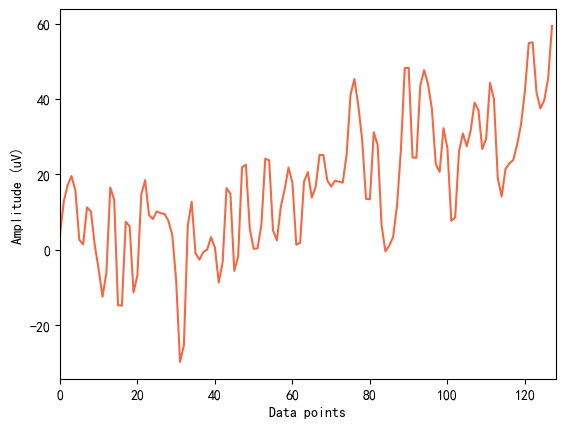

In [26]:
ch_1_f =(pd.DataFrame(filtered_data)).iloc[0,:]
hex_orange = '#f56842'
plt.plot(ch_1_f,hex_orange)
plt.xlim(0,128)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
# plt.savefig("raw_eeg_1.png", dpi=500, bbox_inches='tight')
plt.show()

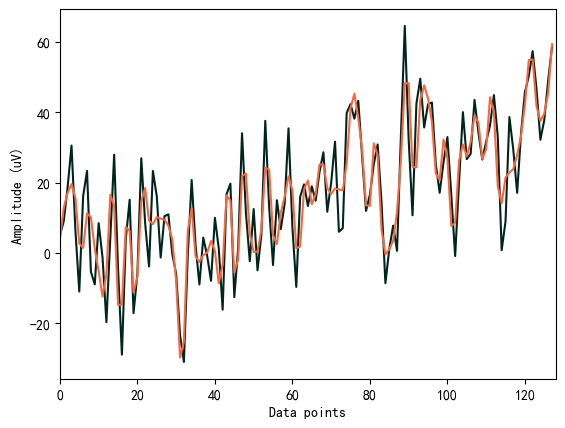

In [27]:
ch_1 = pd.DataFrame(data.iloc[0,:])
hex_green = '#00251C'
plt.plot(ch_1,hex_green)
plt.xlim(0,128)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
# plt.savefig("raw_eeg_1.png", dpi=500, bbox_inches='tight')
ch_1_f =(pd.DataFrame(filtered_data)).iloc[0,:]
hex_orange = '#f56842'
plt.plot(ch_1_f,hex_orange)
plt.xlim(0,128)
plt.xlabel('Data points')
plt.ylabel('Amplitude (uV)')
plt.savefig("contrast.png", dpi=500, bbox_inches='tight')
plt.show()

In [28]:
wavelet = pywt.Wavelet('db4')


In [29]:
coeffs = []
for i in range(32):
    wp = pywt.WaveletPacket(data=filtered_data[i,:], wavelet=wavelet, mode='symmetric', maxlevel=3)
    node = wp['a']
    coeffs.append(node.data)

In [30]:
#小波包系数
coeffs
coeffs_list = pd.DataFrame(coeffs)
coeffs_list
# print(coeffs)
#是一个包含每个通道小波包系数的列表
#其中每个元素是一个一维Numpy数组

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,21.401303,24.759453,5.585959,17.359601,28.149072,4.207832,14.949100,2.524415,-17.872658,22.556739,...,38.390464,61.692745,28.103902,28.984888,34.156224,47.021442,77.533177,59.839122,55.217550,83.645882
1,56.528363,63.052047,37.130720,54.404349,63.529009,41.655418,38.461299,33.251739,2.312069,47.477690,...,61.712313,83.139723,47.666843,51.578864,54.977395,74.052018,107.122023,72.439422,77.344762,104.670324
2,-8.131855,-8.090961,-34.957626,-18.713723,-2.567694,-25.059941,-12.798562,-17.395573,-45.888815,2.643513,...,-9.665083,21.978291,-13.729203,-15.289238,-13.961338,10.780835,41.380304,2.065093,0.748897,20.901321
3,14.165098,25.810749,-1.257859,18.229882,21.918125,2.062491,4.639746,3.932959,-21.459088,20.489123,...,3.297552,34.105807,0.958379,6.621591,8.573902,11.631064,43.332502,-3.006401,2.757765,24.676960
4,105.063988,105.715395,89.821315,98.856742,110.717808,88.524883,90.706062,81.817186,57.430335,105.947112,...,51.550206,75.327586,44.893967,46.578529,43.057401,50.954266,77.676551,45.269939,50.402977,79.867300
5,-47.844083,-40.309761,-42.946573,-39.905365,-44.153933,-51.584899,-50.444717,-54.927854,-64.790727,-51.624890,...,144.000616,113.594373,96.868964,82.197795,82.680220,93.838056,97.723900,81.106201,48.242354,43.766791
6,-15.926853,-14.284982,-17.665778,-15.673642,-13.435604,-21.858712,-18.351472,-23.464008,-25.874142,-23.312057,...,-11.496723,-20.156962,-30.926229,-28.870512,-23.988340,-0.922170,8.154018,5.039432,-14.427607,-13.312613
7,24.479803,24.701039,-3.365811,13.210636,31.663693,2.829771,2.967081,14.360146,-3.753634,8.733215,...,9.178364,-26.960441,-49.791010,-28.325316,-20.477775,-4.092581,22.375605,28.632992,-12.438021,-12.182881
8,141.248194,161.630755,131.417258,154.695582,152.659817,126.683847,135.684717,134.216642,120.703182,163.178181,...,84.247434,123.728038,84.458835,99.128177,96.158162,99.823969,121.552865,74.632583,74.373331,101.016035
9,133.158668,141.966845,109.076697,131.274052,141.726010,115.765047,118.013105,116.205054,108.720916,149.074119,...,90.496213,119.868587,89.507233,102.937989,94.988115,109.947102,111.891155,79.837954,80.305328,102.994733


In [31]:
#计算每个小波包系数的能量
energy = []
for i in range(32):
    energy.append([np.sum(np.square(coeffs[i]))])

In [32]:
energy

[[76446.5044198273],
 [173051.59890007568],
 [45341.94797435623],
 [25245.474366944843],
 [336621.03775995784],
 [828833.3071589404],
 [51312.20131752007],
 [44924.152097224374],
 [957502.8603118332],
 [945354.8957180105],
 [1412787.7613563605],
 [3919732.605950114],
 [302491.18053123576],
 [567882.1393062745],
 [741773.1330098719],
 [207438.01613366188],
 [19033.613106159002],
 [36869.73407222097],
 [1358553.6239424758],
 [1932171.8858590578],
 [580435.2787416157],
 [276555.36865890445],
 [32566.73808120023],
 [467145.14833668113],
 [20825.704453884948],
 [102490.9569469323],
 [40910.27137036546],
 [175766.84793970484],
 [20425.046915015624],
 [359065.35111136443],
 [60328.70333130005],
 [45139.707333885584]]

In [33]:
#计算每个小波包系数的能量比
energy_ratio = []
for i in range(32):
    energy_ratio.append([np.sum(np.square(coeffs[i]))/np.sum(np.square(filtered_data[i,:]))])

In [34]:
energy_ratio

[[1.0446568928269648],
 [1.071105401659765],
 [1.0239070020636563],
 [1.0435947152957703],
 [1.0991965665367687],
 [1.0070174896904258],
 [1.0140787877874256],
 [1.0274481621404452],
 [1.0700097477682236],
 [1.0562724134612713],
 [1.063115022426793],
 [1.0365525526381099],
 [1.0603181772805996],
 [1.0329438712517196],
 [1.0681097503311379],
 [1.126968939567232],
 [1.0931340532878342],
 [1.002440314662639],
 [1.0880163724702303],
 [1.0354967191331037],
 [1.0414957807043688],
 [1.0508885748004018],
 [1.1546306890443971],
 [1.065625359656163],
 [1.04393774036809],
 [1.1094665596526094],
 [1.1605005012702398],
 [1.106995763023088],
 [1.2085592792559958],
 [1.087671775043695],
 [1.1282722317634584],
 [1.0755525864792388]]

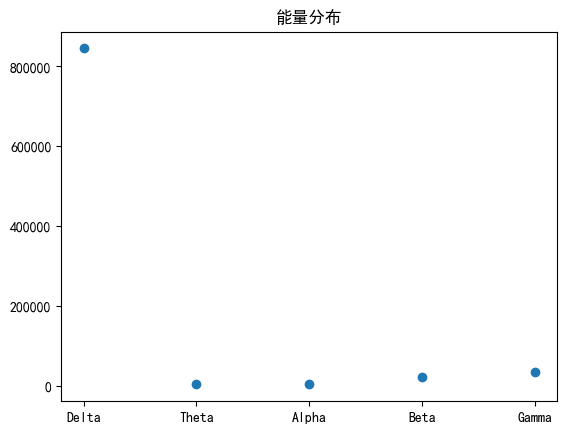

In [43]:
iter_freqs = [
    {'name': 'Delta', 'fmin': 0, 'fmax': 4},
    {'name': 'Theta', 'fmin': 4, 'fmax': 8},
    {'name': 'Alpha', 'fmin': 8, 'fmax': 13},
    {'name': 'Beta', 'fmin': 13, 'fmax': 35},
    {'name': 'Gamma', 'fmin': 35, 'fmax': 100}
    ]

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
mne.set_log_level(False)

maxlevel = 6
fs = 128
wp = pywt.WaveletPacket(data=filtered_data[1,:], wavelet='db4', mode='symmetric', maxlevel=8)

freqTree = [node.path for node in wp.get_level(6, 'freq')]

  # 计算maxlevel最小频段的带宽
freqBand = fs / (2 ** maxlevel)
    # 定义能量数组
energy = []
for iter in range(len(iter_freqs)):
        iterEnergy = 0.0
        for i in range(len(freqTree)):
            # 第i个频段的最小频率
            bandMin = i * freqBand
            # 第i个频段的最大频率
            bandMax = bandMin + freqBand
            # 判断第i个频段是否在要分析的范围内
            if (iter_freqs[iter]['fmin'] <= bandMin and iter_freqs[iter]['fmax'] >= bandMax):
                # 计算对应频段的累加和
                iterEnergy += pow(np.linalg.norm(wp[freqTree[i]].data, ord=None), 2)
        # 保存四个频段对应的能量和
        energy.append(iterEnergy)
hex_blue = '#002fc6'
plt.plot([xLabel['name'] for xLabel in iter_freqs], energy, lw=0, marker='o',)
plt.title('能量分布')
plt.savefig("energy_distribution.png", dpi=500, bbox_inches='tight')
plt.show()

In [44]:
# wp = pywt.WaveletPacket(data=filtered_data[1,:], wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
# # 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
# freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
# # 计算maxlevel最小频段的带宽
# freqBand = fs/(2**maxlevel)
# #######################根据实际情况计算频谱对应关系，这里要注意系数的顺序
# # 绘图显示
# fig, axes = plt.subplots(len(iter_freqs)+1, 1, figsize=(10, 10), sharex=True, sharey=False)
# # 绘制原始数据
# axes[0].plot(filtered_data[1,:], color='#001810', lw=0.5)
# axes[0].set_title('原始数据')
# for iter in range(len(iter_freqs)):
#     # 构造空的小波包
#     new_wp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
#     for i in range(len(freqTree)):
#         # 第i个频段的最小频率
#         bandMin = i * freqBand
#         # 第i个频段的最大频率
#         bandMax = bandMin + freqBand
#         # 判断第i个频段是否在要分析的范围内
#         if (iter_freqs[iter]['fmin']<=bandMin and iter_freqs[iter]['fmax']>= bandMax):
#             # 给新构造的小波包参数赋值
#             new_wp[freqTree[i]] = wp[freqTree[i]].data
#     # 绘制对应频率的数据
#     hex_greens = ['#004b38','#007154','#009770','#00bd8c','#00ffbc']
#     axes[iter+1].plot(new_wp.reconstruct(update=True),hex_greens[iter], lw=0.5)
#         # 设置图名
#     axes[iter+1].set_title(iter_freqs[iter]['name'])
#     plt.savefig("eeg_wavelet.png", dpi=500, bbox_inches='tight')
# plt.show()

In [45]:
# wp = pywt.WaveletPacket(data=filtered_data[1,:5000], wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
# # 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
# freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
# # 计算maxlevel最小频段的带宽
# freqBand = fs/(2**maxlevel)
# #######################根据实际情况计算频谱对应关系，这里要注意系数的顺序
# # 绘图显示
# fig, axes = plt.subplots(len(iter_freqs)+1, 1, figsize=(10, 10), sharex=True, sharey=False)
# # 绘制原始数据
# axes[0].plot(filtered_data[1,:5000], color='#001810', lw=0.5)
# axes[0].set_title('原始数据')
# for iter in range(len(iter_freqs)):
#     # 构造空的小波包
#     new_wp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
#     for i in range(len(freqTree)):
#         # 第i个频段的最小频率
#         bandMin = i * freqBand
#         # 第i个频段的最大频率
#         bandMax = bandMin + freqBand
#         # 判断第i个频段是否在要分析的范围内
#         if (iter_freqs[iter]['fmin']<=bandMin and iter_freqs[iter]['fmax']>= bandMax):
#             # 给新构造的小波包参数赋值
#             new_wp[freqTree[i]] = wp[freqTree[i]].data
#     # 绘制对应频率的数据
#     hex_greens = ['#004b38','#007154','#009770','#00bd8c','#00ffbc']
#     axes[iter+1].plot(new_wp.reconstruct(update=True),hex_greens[iter], lw=0.5)
#         # 设置图名
#     axes[iter+1].set_title(iter_freqs[iter]['name'])
#     plt.savefig("eeg_wavelet_short.png", dpi=500, bbox_inches='tight')
# plt.show()

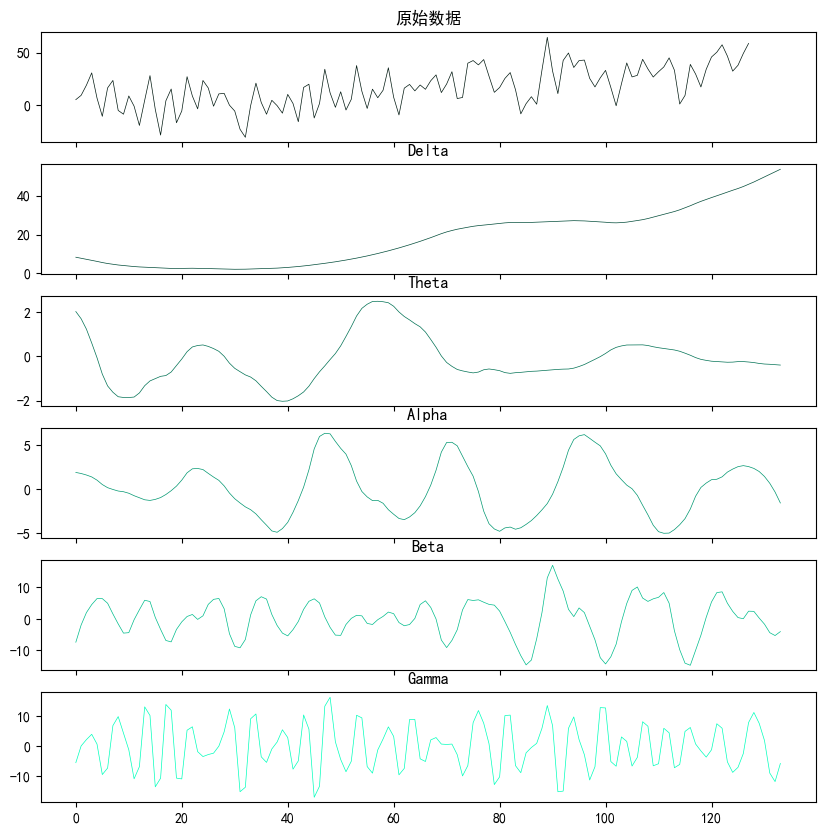

In [46]:
wp = pywt.WaveletPacket(data=filtered_data[0,:], wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
# 频谱由低到高的对应关系，这里需要注意小波变换的频带排列默认并不是顺序排列，所以这里需要使用’freq‘排序。
freqTree = [node.path for node in wp.get_level(maxlevel, 'freq')]
# 计算maxlevel最小频段的带宽
freqBand = fs/(2**maxlevel)
#######################根据实际情况计算频谱对应关系，这里要注意系数的顺序
# 绘图显示
fig, axes = plt.subplots(len(iter_freqs)+1, 1, figsize=(10, 10), sharex=True, sharey=False)
# 绘制原始数据
axes[0].plot(data.iloc[0,0:128], color='#001810', lw=0.5)
axes[0].set_title('原始数据')
for iter in range(len(iter_freqs)):
    # 构造空的小波包
    new_wp = pywt.WaveletPacket(data=None, wavelet=wavelet, mode='symmetric', maxlevel=maxlevel)
    for i in range(len(freqTree)):
        # 第i个频段的最小频率
        bandMin = i * freqBand
        # 第i个频段的最大频率
        bandMax = bandMin + freqBand
        # 判断第i个频段是否在要分析的范围内
        if iter_freqs[iter]['fmin']<=bandMin and iter_freqs[iter]['fmax']>= bandMax:
            # 给新构造的小波包参数赋值
            new_wp[freqTree[i]] = wp[freqTree[i]].data
    # 绘制对应频率的数据
    hex_greens = ['#004b38','#007154','#009770','#00bd8c','#00ffbc']
    axes[iter+1].plot(new_wp.reconstruct(update=True),hex_greens[iter], lw=0.5)
        # 设置图名
    axes[iter+1].set_title(iter_freqs[iter]['name'])
plt.savefig("eeg_wavelet_short_more.png", dpi=500, bbox_inches='tight')
plt.show()